# Credit One

## Preprocesamiento del Set

### Inicialización de librerias

In [116]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
from bokeh.plotting import figure, output_file, show

### Carga de información

In [122]:
credit = pd.read_csv('D:\Personal\Cenfotec\Modulo 5\Fuente\default of credit card clients.csv', header =1)

### Se renombran las columnas para mejor entendimiento

In [123]:
credit=credit.rename(columns={"PAY_0": "PAY_April", "PAY_2": "PAY_May", "PAY_3": "PAY_Jun", "PAY_4": "PAY_Jul", "PAY_5": "PAY_Aug", "PAY_6": "PAY_Set"})
credit=credit.rename(columns={"BILL_AMT1": "BILL_AMT_Set", "BILL_AMT2": "BILL_AMT_Aug", "BILL_AMT3": "BILL_AMT_Jul", "BILL_AMT4": "BILL_AMT_Jun", "BILL_AMT5": "BILL_AMT_May", "BILL_AMT6": "BILL_AMT_Abril"})
credit=credit.rename(columns={"PAY_AMT1": "PAY_AMT_Set", "PAY_AMT2": "PAY_AMT_Aug", "PAY_AMT3": "PAY_AMT_Jul", "PAY_AMT4": "PAY_AMT_Jun", "PAY_AMT5": "PAY_AMT_May", "PAY_AMT6": "PAY_AMT_Abril"})
credit=credit.rename(columns={"default payment next month": "DEFAULT"})

### Al ser un módelo de Clasificación, Se cambian variables a catagoricas

In [131]:
credit=credit.astype({'SEX':'category','AGE':'category','EDUCATION':'category','MARRIAGE':'category','PAY_April':'category','PAY_May':'category','PAY_Jun':'category','PAY_Jul':'category','PAY_Aug':'category','PAY_Set':'category','DEFAULT':'category'})

### Se modifican los valores por su prosa en busqueda de un mejor entendimiento de la información.

#### Modificar Record de pagos

In [220]:
credit['PAY_April']=credit['PAY_April'].replace({-2: "No consumption"})
credit['PAY_April']=credit['PAY_April'].replace({-1: "Paid in full"})
credit['PAY_April']=credit['PAY_April'].replace({0: "The use of revolving credit"})

credit['PAY_Jun']=credit['PAY_Jun'].replace({-2: "No consumption"})
credit['PAY_Jun']=credit['PAY_Jun'].replace({-1: "Paid in full"})
credit['PAY_Jun']=credit['PAY_Jun'].replace({0: "The use of revolving credit"})

credit['PAY_Jul']=credit['PAY_Jul'].replace({-2: "No consumption"})
credit['PAY_Jul']=credit['PAY_Jul'].replace({-1: "Paid in full"})
credit['PAY_Jul']=credit['PAY_Jul'].replace({0: "The use of revolving credit"})

credit['PAY_Aug']=credit['PAY_Aug'].replace({-2: "No consumption"})
credit['PAY_Aug']=credit['PAY_Aug'].replace({-1: "Paid in full"})
credit['PAY_Aug']=credit['PAY_Aug'].replace({0: "The use of revolving credit"})

credit['PAY_Set']=credit['PAY_Set'].replace({-2: "No consumption"})
credit['PAY_Set']=credit['PAY_Set'].replace({-1: "Paid in full"})
credit['PAY_Set']=credit['PAY_Set'].replace({0: "The use of revolving credit"})

credit['PAY_May']=credit['PAY_May'].replace({-2: "No consumption"})
credit['PAY_May']=credit['PAY_May'].replace({-1: "Paid in full"})
credit['PAY_May']=credit['PAY_May'].replace({0: "The use of revolving credit"})

#### Modificar valores de Genero

In [132]:
credit['SEX']=credit['SEX'].replace({1: "Male"})
credit['SEX']=credit['SEX'].replace({2: "Female"})

#### Modificar valores de Educación 

In [133]:
credit['EDUCATION']=credit['EDUCATION'].replace({1: "Graduate school"})
credit['EDUCATION']=credit['EDUCATION'].replace({2: "University"})
credit['EDUCATION']=credit['EDUCATION'].replace({3: " high school"})
credit['EDUCATION']=credit['EDUCATION'].replace({0: "others"})
credit['EDUCATION']=credit['EDUCATION'].replace({4: "others"})
credit['EDUCATION']=credit['EDUCATION'].replace({5: "others"})
credit['EDUCATION']=credit['EDUCATION'].replace({6: "others"})

#### Modificar Valores de Estado Civil

In [134]:
credit['MARRIAGE']=credit['MARRIAGE'].replace({1: "Married"})
credit['MARRIAGE']=credit['MARRIAGE'].replace({2: "Single"})
credit['MARRIAGE']=credit['MARRIAGE'].replace({3: "Divorce"})
credit['MARRIAGE']=credit['MARRIAGE'].replace({0: "others"})

In [135]:
credit['DEFAULT']=credit['DEFAULT'].replace({1: "Yes"})
credit['DEFAULT']=credit['DEFAULT'].replace({0: "No"})

### Se imprime el dataset para la revisión del mismo

In [224]:
display(credit)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_April,PAY_May,PAY_Jun,PAY_Jul,...,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Abril,PAY_AMT_Set,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Abril,default payment next month
0,1,20000,Female,University,Married,24,2,2,Paid in full,Paid in full,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,Paid in full,2,The use of revolving credit,The use of revolving credit,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,Paid in full,The use of revolving credit,Paid in full,The use of revolving credit,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,high school,Married,39,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,high school,Single,43,Paid in full,Paid in full,Paid in full,Paid in full,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,Paid in full,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,high school,Married,41,1,Paid in full,The use of revolving credit,The use of revolving credit,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Revisión de Datos Faltantes

In [266]:
total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_Set,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_April,PAY_May,PAY_Jun,...,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Abril,PAY_AMT_Set,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Matriz de Correlación

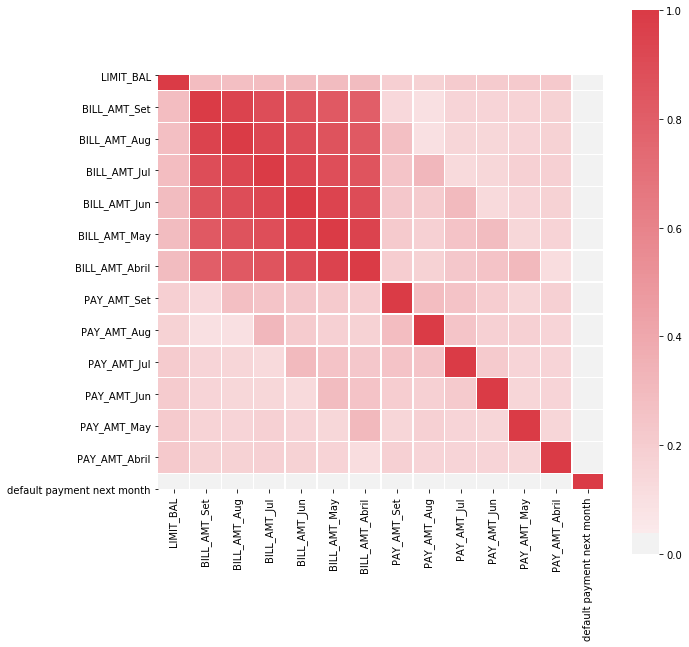

In [225]:
import seaborn as sns

corr = credit.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

#### Se Dicretiza la variable Age, con la finalidad de simplificar los valores

In [226]:
from sklearn.preprocessing import KBinsDiscretizer

A1_dis = KBinsDiscretizer(n_bins=4, encode='ordinal',
                           strategy = "kmeans").fit_transform(credit[['AGE']])

A1_dis = pd.DataFrame(A1_dis)
A1_dis = A1_dis.rename(columns = {0: 'AGE_D'})
credit[['AGE_D']] = A1_dis

In [230]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_April',
       'PAY_May', 'PAY_Jun', 'PAY_Jul', 'PAY_Aug', 'PAY_Set', 'BILL_AMT_Set',
       'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun', 'BILL_AMT_May',
       'BILL_AMT_Abril', 'PAY_AMT_Set', 'PAY_AMT_Aug', 'PAY_AMT_Jul',
       'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Abril',
       'default payment next month', 'AGE_D'],
      dtype='object')


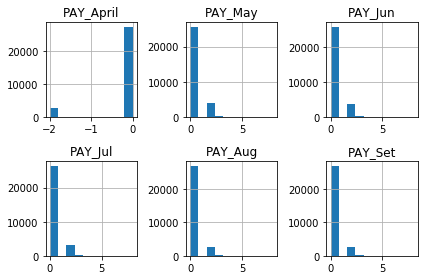

In [129]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

fil = (credit.PAY_April > -2) | (credit.PAY_April == -1) | (credit.PAY_April == 0)
credit.loc[fil, 'PAY_April'] = 0
fil = (credit.PAY_May == -2) | (credit.PAY_May == -1) | (credit.PAY_May == 0)
credit.loc[fil, 'PAY_May'] = 0
fil = (credit.PAY_Jun == -2) | (credit.PAY_Jun == -1) | (credit.PAY_Jun == 0)
credit.loc[fil, 'PAY_Jun'] = 0
fil = (credit.PAY_Jul == -2) | (credit.PAY_Jul == -1) | (credit.PAY_Jul == 0)
credit.loc[fil, 'PAY_Jul'] = 0
fil = (credit.PAY_Aug == -2) | (credit.PAY_Aug == -1) | (credit.PAY_Aug == 0)
credit.loc[fil, 'PAY_Aug'] = 0
fil = (credit.PAY_Set == -2) | (credit.PAY_Set == -1) | (credit.PAY_Set == 0)
credit.loc[fil, 'PAY_Set'] = 0
late = credit[['PAY_April','PAY_May', 'PAY_Jun', 'PAY_Jul', 'PAY_Aug', 'PAY_Set']]
draw_histograms(late, late.columns, 2, 3, 10)

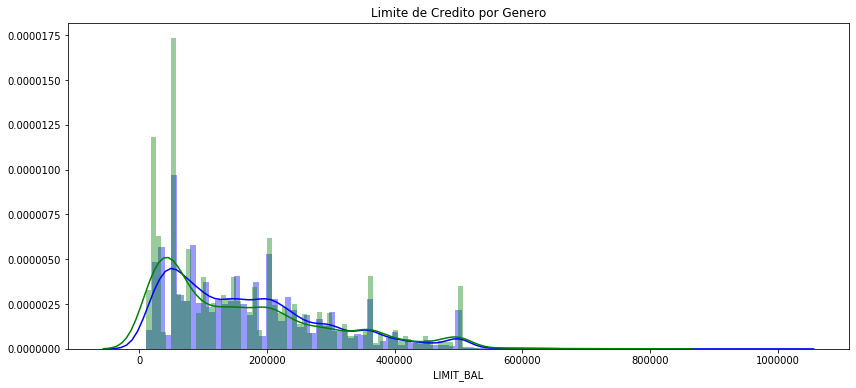

In [136]:
class_0 = credit.loc[credit['SEX'] == 'Male']["LIMIT_BAL"]
class_1 = credit.loc[credit['SEX'] == 'Female']["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Limite de Credito por Genero')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=100, color="blue")
sns.distplot(class_0,kde=True,bins=100, color="green")
plt.show()

Text(0.5, 1.0, 'Distribución de limite por Nivel Edicativo')

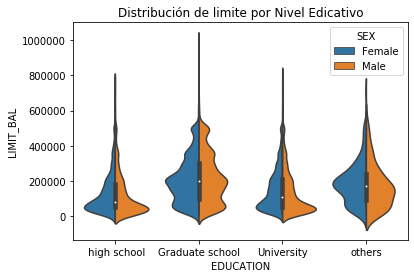

In [41]:
ax=sns.violinplot(x='EDUCATION',y='LIMIT_BAL',hue='SEX',split=True,data=credit)
ax.set_title('Distribución de limite por Nivel Edicativo')

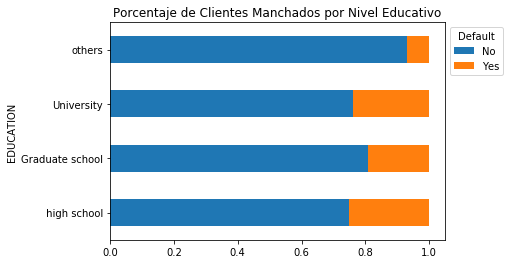

In [90]:
ax=credit.groupby("EDUCATION")['DEFAULT']\
                                .value_counts(normalize=True)\
                                .unstack()\
                                .plot(kind='barh',stacked='True')
ax.set_title("Porcentaje de Clientes Manchados por Nivel Educativo")
ax.legend(title='Default',bbox_to_anchor=(1,1))

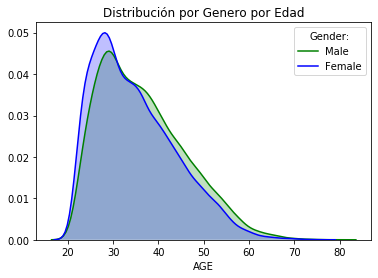

In [139]:
fig,ax=plt.subplots()
sns.distplot(credit.loc[credit.SEX=="Male",'AGE'].dropna(),
            hist=False, color='green',
            kde_kws={"shade":True},
            ax=ax, label='Male')
sns.distplot(credit.loc[credit.SEX=="Female",'AGE'].dropna(),
            hist=False, color='blue',
            kde_kws={"shade":True},
            ax=ax, label='Female')
ax.set_title("Distribución por Genero por Edad")
ax.legend(title='Gender:')

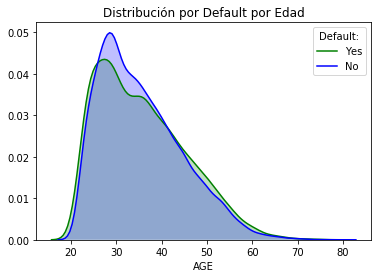

In [138]:
fig,ax=plt.subplots()
sns.distplot(credit.loc[credit.DEFAULT=="Yes",'AGE'].dropna(),
            hist=False, color='green',
            kde_kws={"shade":True},
            ax=ax, label='Yes')
sns.distplot(credit.loc[credit.DEFAULT=="No",'AGE'].dropna(),
            hist=False, color='blue',
            kde_kws={"shade":True},
            ax=ax, label='No')
ax.set_title("Distribución por Default por Edad")
ax.legend(title='Default:')